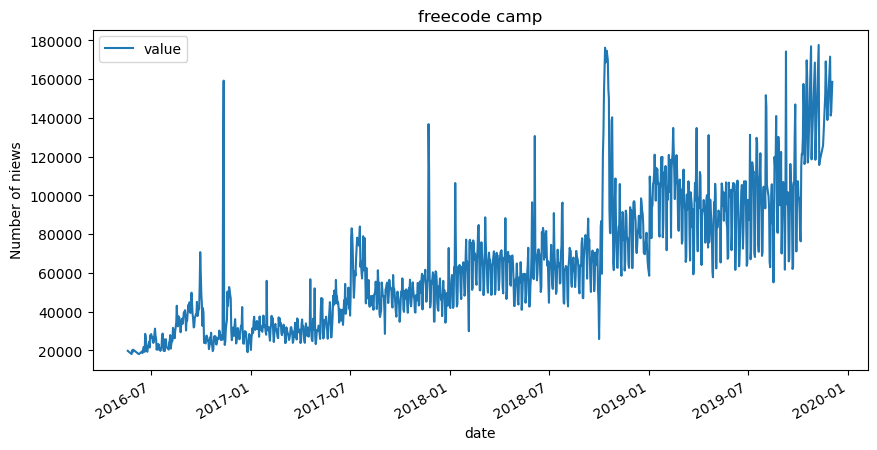

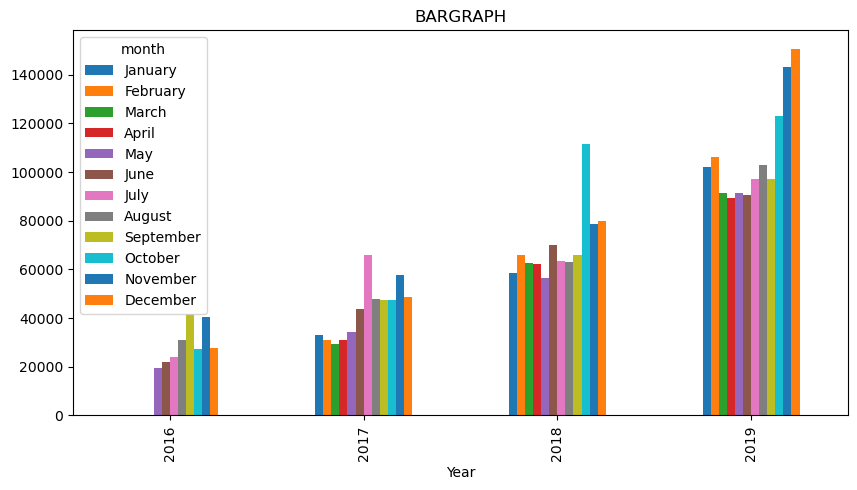

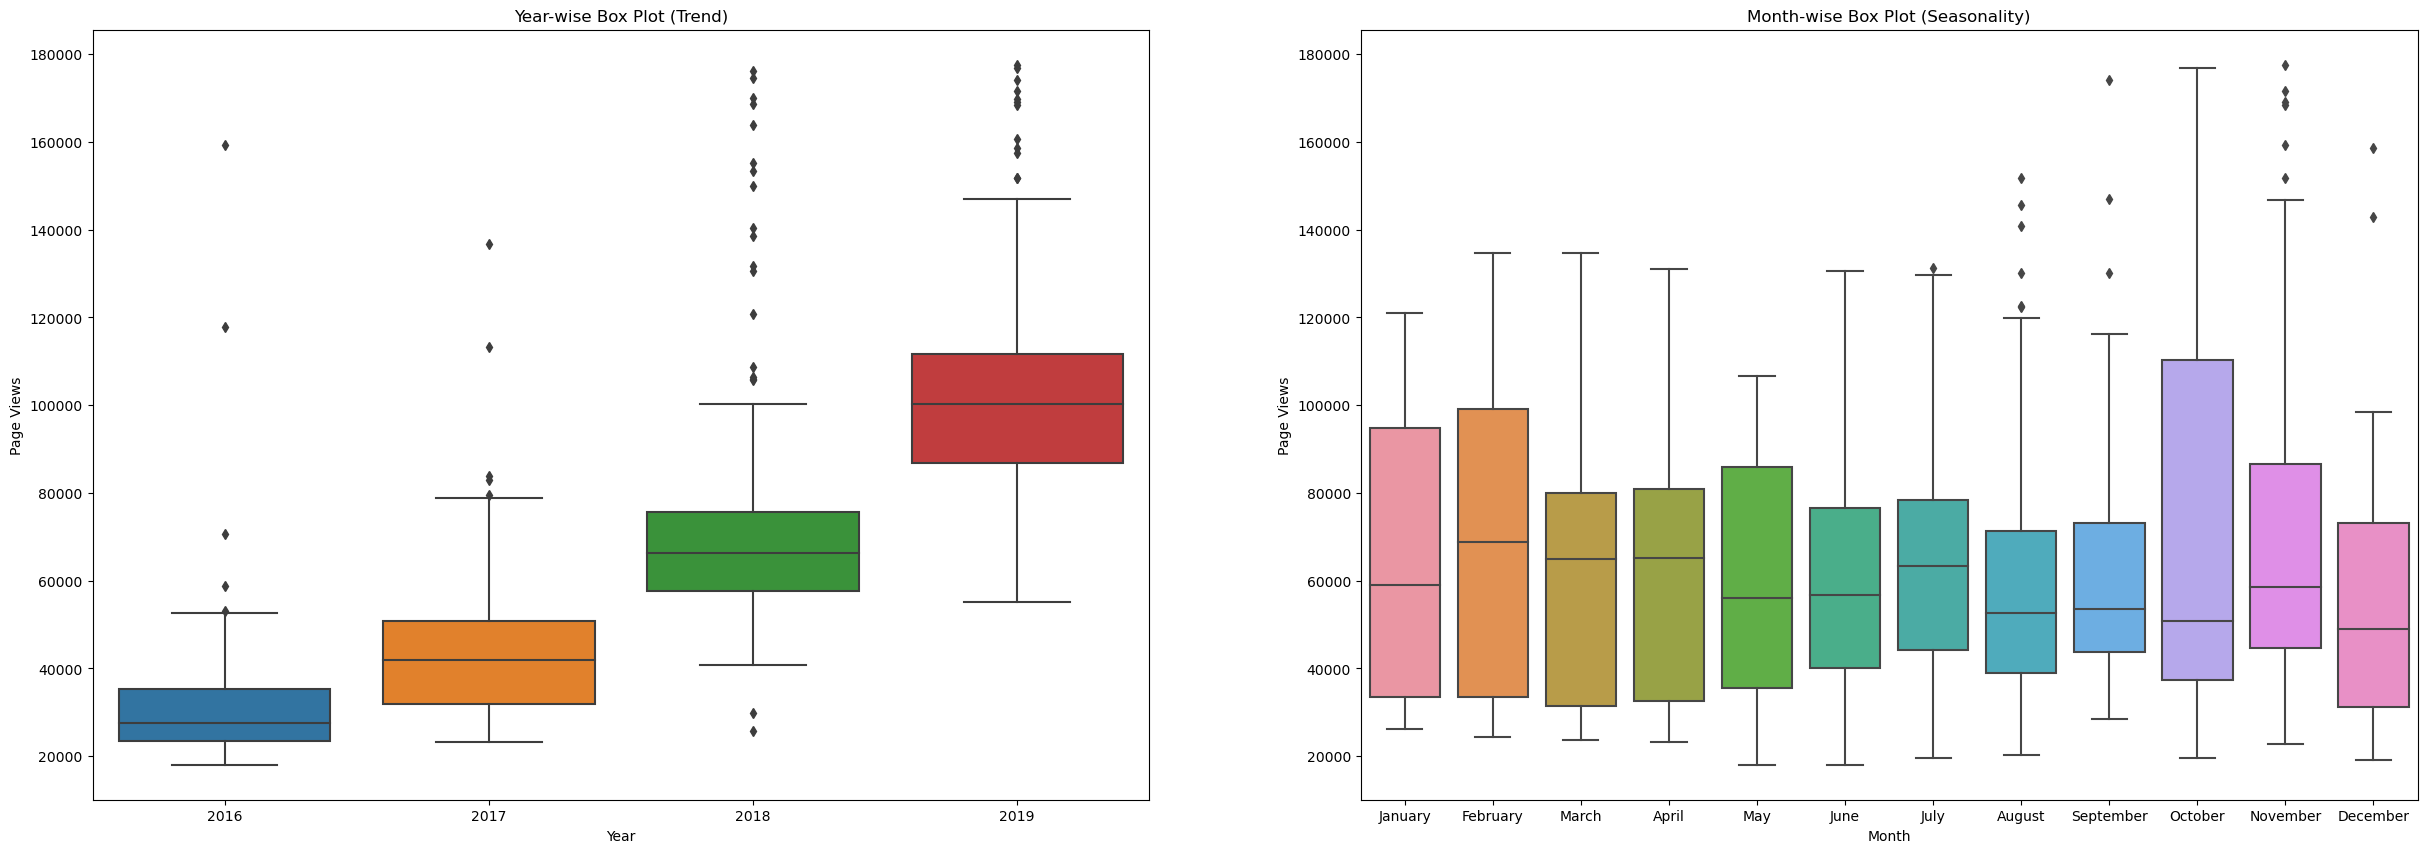

In [2]:
#importing the required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
#Read the csv file
df = pd.read_csv('fcc.csv', index_col='date',parse_dates=['date'])
df = df[(df['value']>df['value'].quantile(0.025))&(df['value']<df['value'].quantile(0.975))]
#Draws a line plot
def draw_line_plot(df):
    fig = df.plot.line(figsize=(10,5))
    plt.title('freecode camp')
    plt.xlabel('date')
    plt.ylabel('Number of niews')
#Draws a bar plot
def draw_bar_plot(df):
    dfr = df.copy()
    dfr['year']= df.index.year
    dfr['month']=df.index.month_name()
    dfrg = dfr.groupby(['year','month'])['value'].mean()
    dfrg = dfrg.unstack(level='month')
    dfrg = dfrg[['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December']]

    fig = dfrg.plot.bar(figsize=(10,5))
    plt.xlabel('Year')
    plt.title('BARGRAPH')
    
#draws a box plot
def draw_box_plot(df):
    dfr = df.copy()
    dfr['year']= df.index.year
    dfr['month']=df.index.month_name()
    dfry = dfr[['year','value']]
    dfrm = dfr[['month','value']]
    mon_order =['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
    ax1=se.boxplot(dfry,x='year',y='value',ax = ax1)
    ax2=se.boxplot(dfrm,x='month',y='value',ax=ax2,order=mon_order)
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

draw_line_plot(df)
draw_bar_plot(df)
draw_box_plot(df)